<a href="https://colab.research.google.com/github/rsmarinho/filtros/blob/main/pyscripts/transformacoes_em_frequencia_e_escalamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformações em Frequência e Escalamentos

A idéia de utilizar transformações em frequência é simplificar o projeto de filtros, pois simplificam o procedimento de obtensão da função de transferência e/ou de uma rede passiva RLC, já que os requisitos de qualquer filtro se transformam nos requisitos de um filtro passa-baixa normalizado.

O primeiro passo associado a estes procedimentos consiste em fazer uma transformação e um escalamento. Após o projeto do filtro passa-baixa normalizado, deve-se fazer a transformação inversa e novo escalamento para obtensão do flitro desejado.

Durante esse processo, é conveniente que o filtro seja escalado de forma que em $\omega_p=1$ a atenuação seja $A_{MAX}$, e então procedemos co ma transformação desejada.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

db = lambda x : 10*np.log10(x)

def plot_conf(ax, xlim=[1e-1, 1e1], ylim=[-2, 0.3e2]):

  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.grid(b=True, which='major', color='lightgray', ls='-')
  ax.grid(b=True, which='minor', color='lightgray', ls='--')

### Exemplo 02:

In [15]:
Q = 3
w = np.logspace(-1, 5, 500)
wp = 2*np.pi*400
print(wp)

num = np.poly1d([1])
den = np.poly1d([1, 1/Q, 1])
A = lambda x : num(x)/den(x)

2513.2741228718346


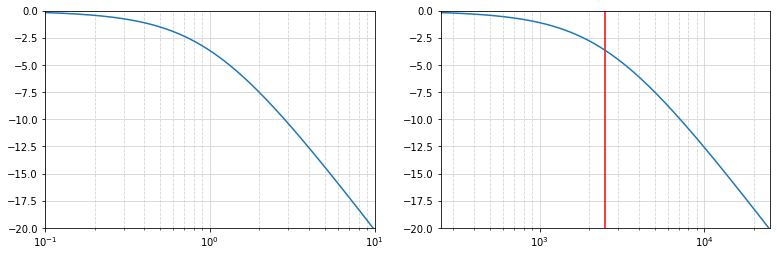

In [16]:
fig = plt.figure(figsize=(13,4))

ax = plt.subplot(121)
plt.semilogx(w, db(A(w)))
plot_conf(ax, xlim=[1e-1, 1e1], ylim=[-20, 0])

ax = plt.subplot(122)
plt.semilogx(w, db(A(w/wp)))
plt.vlines(wp, -20, 0, 'r')
plot_conf(ax, xlim=[wp/10, wp*10], ylim=[-20, 0])

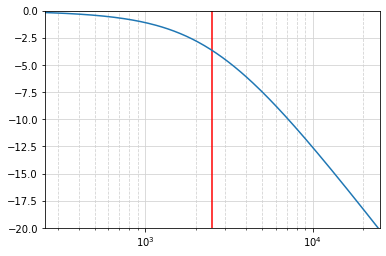

In [18]:
fig = plt.figure(figsize=(6,4))

num = np.poly1d([wp**2])
den = np.poly1d([1, wp/Q, wp**2])
A = lambda x : num(x)/den(x)

ax = plt.subplot(111)
plt.semilogx(w, db(A(w)))
plt.vlines(wp, -20, 0, 'r')
plot_conf(ax, xlim=[wp/10, wp*10], ylim=[-20, 0])

---
### Exemplo 03:

In [46]:
Q = 3
w = np.logspace(-1, 5, 500)
wp = 2*np.pi*400
ws = 2*np.pi*800
print(wp)
print(ws)

num = np.poly1d([1])
den = np.poly1d([1, 1/Q, 1])
A = lambda x : num(x)/den(x)

2513.2741228718346
5026.548245743669


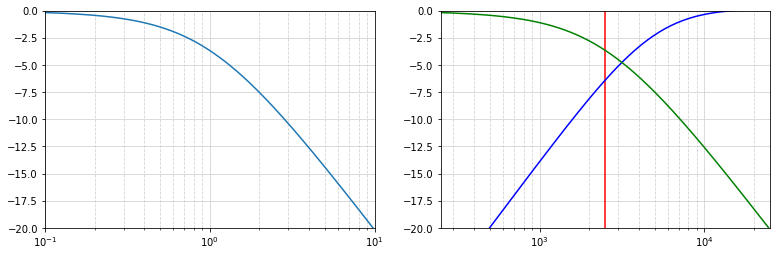

In [50]:
fig = plt.figure(figsize=(13,4))

ax = plt.subplot(121)
plt.semilogx(w, db(A(w)))
plot_conf(ax, xlim=[1e-1, 1e1], ylim=[-20, 0])

ax = plt.subplot(122)
plt.semilogx(w, db(A(-ws/w)), 'b')
plt.vlines(wp, -20, 0, 'r')
plt.semilogx(w, db(A(w/wp)), 'g')
plot_conf(ax, xlim=[wp/10, wp*10], ylim=[-20, 0])

---
### Exemplo 04

In [65]:
w = np.logspace(-1, 9, 500)
w0 = 2*np.pi*400

print(w0)

num = np.poly1d([1])
den = np.poly1d([1, 1])
A = lambda x : num(x)/den(x)

2513.2741228718346


In [66]:
w1 = 2*np.pi*340
w2 = 2*np.pi*460
w3 = 2*np.pi*300
w4 = 2*np.pi*500

ws = (w4-w3) / (w2-w1)
B = w2-w1

print(B)
print(np.sqrt(w1*w2))
print(np.sqrt(w3*w4))

753.9822368615505
2484.8389310620323
2433.467205584167


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


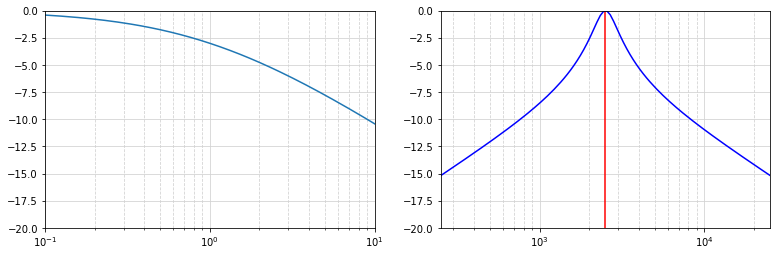

In [71]:
fig = plt.figure(figsize=(13,4))

ax = plt.subplot(121)
plt.semilogx(w, db(A(w)))
plot_conf(ax, xlim=[1e-1, 1e1], ylim=[-20, 0])

ax = plt.subplot(122)
plt.semilogx(w, db(A((-w**2+w0**2) / (B * 1j*w))), 'b')
plt.vlines(wp, -20, 0, 'r')
plot_conf(ax, xlim=[wp/10, wp*10], ylim=[-20, 0])